<a href="https://colab.research.google.com/github/PratyushMaharana/kabootar/blob/main/bird_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("gpreda/xenocanto-birds-from-india")

print("Path to dataset files:", path)

100%|██████████| 1.41M/1.41M [00:00<00:00, 1.89MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/gpreda/xenocanto-birds-from-india/versions/1


In [ ]:
!pip install librosa soundfile numpy matplotlib scikit-learn pydub

In [ ]:
import os

os.makedirs("dataset/crow", exist_ok=True)
os.makedirs("spectrograms", exist_ok=True)

In [ ]:
from google.colab import files

uploaded = files.upload()
print("Uploaded files:", uploaded.keys())

Saving 3lpy5bmrl9j-crow-sfx-8.mp3 to 3lpy5bmrl9j-crow-sfx-8.mp3
Uploaded files: dict_keys(['3lpy5bmrl9j-crow-sfx-8.mp3'])


In [ ]:
import librosa
import soundfile as sf
import os

i = 1
for filename in uploaded.keys():
    audio, sr = librosa.load(filename, sr=None)
    out_path = f"dataset/crow/crow_{i}.wav"
    sf.write(out_path, audio, sr)
    print(f"Saved {out_path}")
    i += 1

Saved dataset/crow/crow_1.wav


In [ ]:
!ls dataset/crow

crow_1.wav


In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import os

for file in os.listdir("dataset/crow"):
    path = os.path.join("dataset/crow", file)
    y, sr = librosa.load(path)

    plt.figure(figsize=(6,4))
    S = librosa.feature.melspectrogram(y=y, sr=sr)
    S_DB = librosa.power_to_db(S, ref=np.max)

    librosa.display.specshow(S_DB, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title("Crow Spectrogram")

    plt.savefig(f"spectrograms/{file.replace('.wav','.png')}")
    plt.close()

print("Spectrograms generated")

Spectrograms generated


In [ ]:
import librosa
import numpy as np
import pickle
from sklearn.neighbors import KNeighborsClassifier
import os

X, y = [], []

for file in os.listdir("dataset/crow"):
    path = os.path.join("dataset/crow", file)
    audio, sr = librosa.load(path)

    mfcc = np.mean(librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13), axis=1)
    X.append(mfcc)
    y.append("crow")

model = KNeighborsClassifier(n_neighbors=1)
model.fit(X, y)

with open("crow_model.pkl", "wb") as f:
    pickle.dump(model, f)

print("Model trained successfully")

Model trained successfully


In [ ]:
from google.colab import files
test_files = files.upload()
print("Test file uploaded:", test_files.keys())

Saving ajh4wib33l-crow-sfx-6.mp3 to ajh4wib33l-crow-sfx-6 (1).mp3
Test file uploaded: dict_keys(['ajh4wib33l-crow-sfx-6 (1).mp3'])


Predicted Bird: CROW


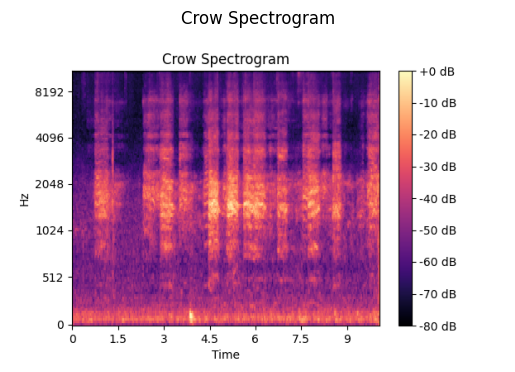

In [ ]:
import librosa
import numpy as np
import pickle
import matplotlib.pyplot as plt

test_filename = list(test_files.keys())[0]

model = pickle.load(open("crow_model.pkl", "rb"))

audio, sr = librosa.load(test_filename)
mfcc = np.mean(librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13), axis=1)

prediction = model.predict([mfcc])[0]
print("Predicted Bird:", prediction.upper())

img = plt.imread("spectrograms/crow_1.png")
plt.imshow(img)
plt.axis("off")
plt.title("Crow Spectrogram")
plt.show()

Dataset folders ready
Crow audios added

UPLOAD SPARROW AUDIO


Saving house-sparrow-31116.mp3 to house-sparrow-31116.mp3
Sparrow audio added
Model trained successfully

UPLOAD UNKNOWN BIRD AUDIO


Saving 3lpy5bmrl9j-crow-sfx-8.mp3 to 3lpy5bmrl9j-crow-sfx-8 (1).mp3

Predicted Bird: CROW


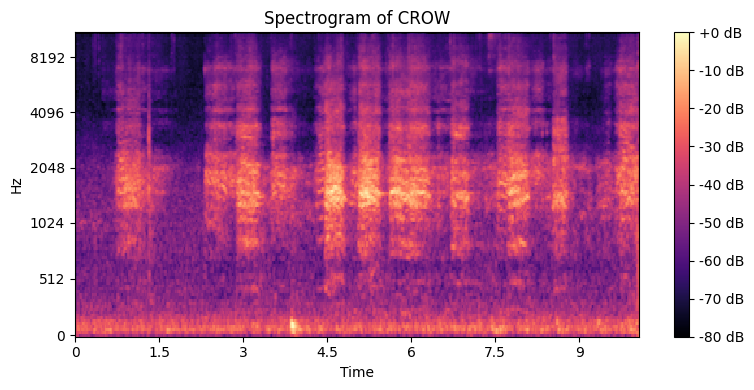

In [ ]:
# ==============================
# BIRD SOUND IDENTIFICATION PROJECT
# Crow + Sparrow
# ==============================

# Install required libraries
!pip install librosa soundfile scikit-learn matplotlib

# ------------------------------
# Import Libraries
# ------------------------------
import os
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from sklearn.neighbors import KNeighborsClassifier
from google.colab import files
import pickle

# ------------------------------
# Create Dataset Folders
# ------------------------------
os.makedirs("dataset/crow", exist_ok=True)
os.makedirs("dataset/sparrow", exist_ok=True)

print("Dataset folders ready")

# ------------------------------
# ADD EXISTING CROW AUDIO
# (Already uploaded earlier)
# ------------------------------
crow_files = [
    "3lpy5bmrl9j-crow-sfx-8.mp3",
    "ajh4wib33l-crow-sfx-6 (1).mp3"
]

i = 1
for file in crow_files:
    audio, sr = librosa.load(file, sr=None)
    sf.write(f"dataset/crow/crow_{i}.wav", audio, sr)
    i += 1

print("Crow audios added")

# ------------------------------
# ADD SPARROW AUDIO (uploaded now)
# ------------------------------
print("\nUPLOAD SPARROW AUDIO")
sparrow_uploaded = files.upload()
sparrow_audio_filename = list(sparrow_uploaded.keys())[0]

audio, sr = librosa.load(sparrow_audio_filename, sr=None)
sf.write("dataset/sparrow/sparrow_1.wav", audio, sr)

print("Sparrow audio added")

# ------------------------------
# FEATURE EXTRACTION
# ------------------------------
X = []
y = []

for bird in os.listdir("dataset"):
    bird_path = os.path.join("dataset", bird)

    for file in os.listdir(bird_path):
        audio, sr = librosa.load(os.path.join(bird_path, file))
        mfcc = np.mean(
            librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13),
            axis=1
        )
        X.append(mfcc)
        y.append(bird)

X = np.array(X)

# ------------------------------
# TRAIN MODEL
# ------------------------------
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X, y)

pickle.dump(model, open("bird_model.pkl", "wb"))
print("Model trained successfully")

# ------------------------------
# UPLOAD UNKNOWN BIRD AUDIO
# ------------------------------
print("\nUPLOAD UNKNOWN BIRD AUDIO")
test_file = files.upload()
test_filename = list(test_file.keys())[0]

# ------------------------------
# PREDICT BIRD
# ------------------------------
audio, sr = librosa.load(test_filename)
mfcc = np.mean(
    librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13),
    axis=1
)

prediction = model.predict([mfcc])[0]
print("\nPredicted Bird:", prediction.upper())

# ------------------------------
# GENERATE SPECTROGRAM
# ------------------------------
S = librosa.feature.melspectrogram(y=audio, sr=sr)
S_DB = librosa.power_to_db(S, ref=np.max)

plt.figure(figsize=(8, 4))
librosa.display.specshow(S_DB, sr=sr, x_axis="time", y_axis="mel")
plt.colorbar(format="%+2.0f dB")
plt.title(f"Spectrogram of {prediction.upper()}")
plt.tight_layout()
plt.show()

Crow dataset ready

UPLOAD SPARROW AUDIO


Saving house-sparrow-31116.mp3 to house-sparrow-31116 (2).mp3
Sparrow dataset ready
Model trained successfully

UPLOAD UNKNOWN BIRD AUDIO


Saving house-sparrow-31116.mp3 to house-sparrow-31116 (3).mp3

Predicted Bird: SPARROW


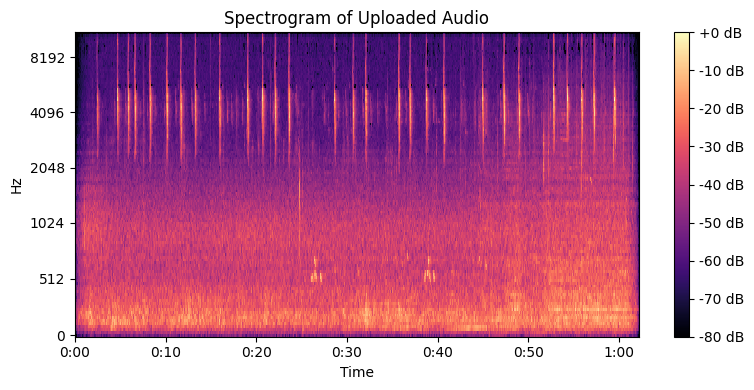

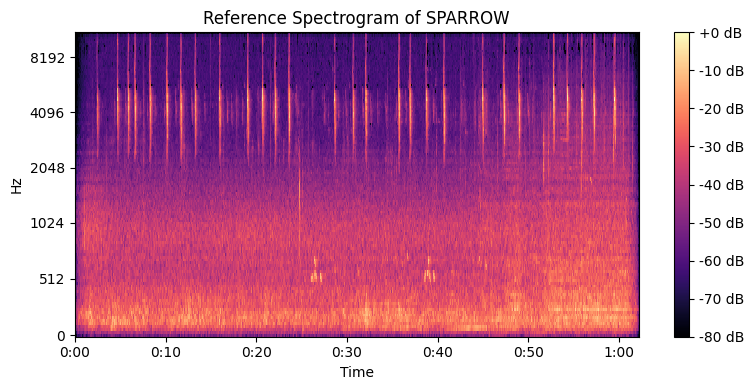

In [ ]:
# ==========================================
# BIRD SOUND IDENTIFICATION PROJECT
# Crow + Sparrow (Final Correct Version)
# ==========================================

# Install required libraries
!pip install librosa soundfile scikit-learn matplotlib

# ------------------------------------------
# Import Libraries
# ------------------------------------------
import os
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from sklearn.neighbors import KNeighborsClassifier
from google.colab import files
import pickle

# ------------------------------------------
# Create Dataset Folders
# ------------------------------------------
os.makedirs("dataset/crow", exist_ok=True)
os.makedirs("dataset/sparrow", exist_ok=True)

# ------------------------------------------
# ADD EXISTING CROW AUDIOS
# ------------------------------------------
crow_files = [
    "3lpy5bmrl9j-crow-sfx-8.mp3", # This file was uploaded earlier
    "ajh4wib33l-crow-sfx-6 (1).mp3" # This file was uploaded earlier
]

i = 1
for file in crow_files:
    audio, sr = librosa.load(file, sr=None)
    sf.write(f"dataset/crow/crow_{i}.wav", audio, sr)
    i += 1

print("Crow dataset ready")

# ------------------------------------------
# ADD SPARROW AUDIO
# ------------------------------------------
print("\nUPLOAD SPARROW AUDIO")
sparrow_uploaded = files.upload()
sparrow_file = list(sparrow_uploaded.keys())[0]

audio, sr = librosa.load(sparrow_file, sr=None)
sf.write("dataset/sparrow/sparrow_1.wav", audio, sr)

print("Sparrow dataset ready")

# ------------------------------------------
# FEATURE EXTRACTION
# ------------------------------------------
X = []
y = []

for bird in os.listdir("dataset"):
    bird_path = os.path.join("dataset", bird)

    for file in os.listdir(bird_path):
        audio, sr = librosa.load(os.path.join(bird_path, file))
        mfcc = np.mean(
            librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13),
            axis=1
        )
        X.append(mfcc)
        y.append(bird)

X = np.array(X)

# ------------------------------------------
# TRAIN MODEL
# ------------------------------------------
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X, y)

pickle.dump(model, open("bird_model.pkl", "wb"))
print("Model trained successfully")

# ------------------------------------------
# UPLOAD UNKNOWN BIRD AUDIO (USER INPUT)
# ------------------------------------------
print("\nUPLOAD UNKNOWN BIRD AUDIO")
test_file_uploaded = files.upload()
test_filename = list(test_file_uploaded.keys())[0]

# ------------------------------------------
# PREDICTION
# ------------------------------------------
audio_test, sr_test = librosa.load(test_filename)
mfcc_test = np.mean(
    librosa.feature.mfcc(y=audio_test, sr=sr_test, n_mfcc=13),
    axis=1
)

prediction = model.predict([mfcc_test])[0]
print("\nPredicted Bird:", prediction.upper())

# ------------------------------------------
# SPECTROGRAM OF UPLOADED AUDIO
# ------------------------------------------
S_test = librosa.feature.melspectrogram(y=audio_test, sr=sr_test)
S_test_db = librosa.power_to_db(S_test, ref=np.max)

plt.figure(figsize=(8,4))
librosa.display.specshow(S_test_db, sr=sr_test, x_axis="time", y_axis="mel")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram of Uploaded Audio")
plt.tight_layout()
plt.show()

# ------------------------------------------
# REFERENCE SPECTROGRAM OF PREDICTED BIRD
# ------------------------------------------
reference_file = os.path.join(
    "dataset",
    prediction,
    os.listdir(f"dataset/{prediction}")[0]
)

audio_ref, sr_ref = librosa.load(reference_file)

S_ref = librosa.feature.melspectrogram(y=audio_ref, sr=sr_ref)
S_ref_db = librosa.power_to_db(S_ref, ref=np.max)

plt.figure(figsize=(8,4))
librosa.display.specshow(S_ref_db, sr=sr_ref, x_axis="time", y_axis="mel")
plt.colorbar(format="%+2.0f dB")
plt.title(f"Reference Spectrogram of {prediction.upper()}")
plt.tight_layout()
plt.show()